## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 10s 197us/step - loss: 1.4182 - accuracy: 0.5020 - val_loss: 1.6497 - val_accuracy: 0.4402
Epoch 49/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.4051 - accuracy: 0.5045 - val_loss: 1.6423 - val_accuracy: 0.4475
Epoch 50/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.4090 - accuracy: 0.5033 - val_loss: 1.6780 - val_accuracy: 0.4417
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 10s 194us/step - loss: 0.4538 - accuracy: 0.8363 - val_loss: 2.0067 - val_accuracy: 0.5295
Epoch 46/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.4290 - accuracy: 0.8453 - val_loss: 2.1067 - val_accuracy: 0.5268
Epoch 47/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.4161 - accuracy: 0.8510 - val_loss: 2.1212 - val_accuracy: 0.5221
Epoch 48/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.3926 - accuracy: 0.8594 - val_loss: 2.2054 - val_accuracy: 0.5266
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.3956 - accuracy: 0.8581 - val_loss: 2.3229 - val_accuracy: 0.5227
Epoch 50/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.3728 - accuracy: 0.8660 - val_loss: 2.2729 - val_accuracy: 0.5241
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 10s 193us/step - loss: 0.9590 - accuracy: 0.6629 - val_loss: 1.3915 - val_accuracy: 0.5281
Epoch 43/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.9497 - accuracy: 0.6681 - val_loss: 1.3957 - val_accuracy: 0.5222
Epoch 44/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.9350 - accuracy: 0.6737 - val_loss: 1.4572 - val_accuracy: 0.5159
Epoch 45/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.9267 - accuracy: 0.6757 - val_loss: 1.3371 - val_accuracy: 0.5405
Epoch 46/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.9103 - accuracy: 0.6794 - val_loss: 1.3758 - val_accuracy: 0.5322
Epoch 47/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.9025 - accuracy: 0.6833 - val_loss: 1.3963 - val_accuracy: 0.5278
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.8869 - accuracy: 0.6896 - va

50000/50000 [==============================] - 10s 209us/step - loss: 1.6013 - accuracy: 0.4416 - val_loss: 1.6130 - val_accuracy: 0.4348
Epoch 40/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5967 - accuracy: 0.4421 - val_loss: 1.6088 - val_accuracy: 0.4329
Epoch 41/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5915 - accuracy: 0.4454 - val_loss: 1.6052 - val_accuracy: 0.4354
Epoch 42/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5870 - accuracy: 0.4454 - val_loss: 1.5999 - val_accuracy: 0.4367
Epoch 43/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.5826 - accuracy: 0.4480 - val_loss: 1.5976 - val_accuracy: 0.4368
Epoch 44/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.5777 - accuracy: 0.4501 - val_loss: 1.5927 - val_accuracy: 0.4418
Epoch 45/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.5727 - accuracy: 0.4521 - va

50000/50000 [==============================] - 10s 194us/step - loss: 1.9902 - accuracy: 0.2997 - val_loss: 1.9883 - val_accuracy: 0.2972
Epoch 37/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.9856 - accuracy: 0.3033 - val_loss: 1.9839 - val_accuracy: 0.2989
Epoch 38/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.9811 - accuracy: 0.3045 - val_loss: 1.9795 - val_accuracy: 0.2987
Epoch 39/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.9767 - accuracy: 0.3063 - val_loss: 1.9753 - val_accuracy: 0.3033
Epoch 40/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.9725 - accuracy: 0.3075 - val_loss: 1.9711 - val_accuracy: 0.3072
Epoch 41/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9684 - accuracy: 0.3106 - val_loss: 1.9671 - val_accuracy: 0.3101
Epoch 42/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.9643 - accuracy: 0.3129 - va

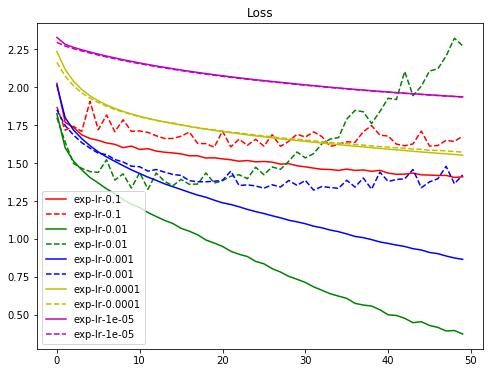

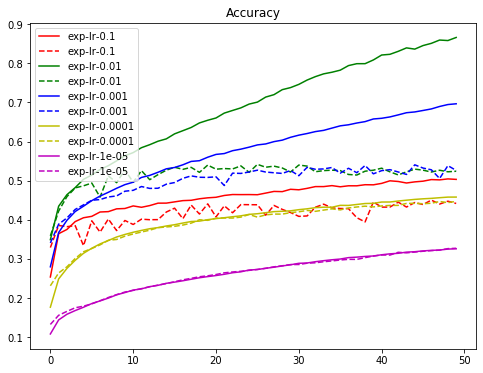

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現